In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [29]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-11 23:09:30,412 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:10:69:2C:3C
2023-02-11 23:09:39,039 | INFO     |: Connected to C0:83:10:69:2C:3C


In [30]:
time_list = []
tof1_list = []
tof2_list = []

In [31]:
def get_tof_cb(uuid, byte_array):
    global time_list, tof1_list, tof2_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        time_list.append(int( s[0].split(":")[1] ))
        tof1_list.append(int( s[1].split(":")[1] ))
        tof2_list.append(int( s[2].split(":")[1] ))
        
        print(s)

In [32]:
ble.start_notify(ble.uuid['RX_STRING'], get_tof_cb)

In [33]:
for i in range(50):
    ble.send_command(CMD.PING, "")

['T:25950', 'TOF1:155', 'TOF2:161']
['T:26073', 'TOF1:154', 'TOF2:159']
['T:26191', 'TOF1:157', 'TOF2:160']
['T:26376', 'TOF1:159', 'TOF2:161']
['T:26554', 'TOF1:154', 'TOF2:159']
['T:26675', 'TOF1:157', 'TOF2:159']
['T:26799', 'TOF1:154', 'TOF2:159']
['T:26921', 'TOF1:156', 'TOF2:159']
['T:27036', 'TOF1:155', 'TOF2:157']
['T:27155', 'TOF1:156', 'TOF2:159']
['T:27272', 'TOF1:161', 'TOF2:160']
['T:27401', 'TOF1:165', 'TOF2:165']
['T:27517', 'TOF1:165', 'TOF2:163']
['T:27638', 'TOF1:169', 'TOF2:165']
['T:27760', 'TOF1:167', 'TOF2:164']
['T:27873', 'TOF1:68', 'TOF2:167']
['T:27997', 'TOF1:76', 'TOF2:167']
['T:28121', 'TOF1:80', 'TOF2:166']
['T:28247', 'TOF1:84', 'TOF2:142']
['T:28360', 'TOF1:79', 'TOF2:158']
['T:28482', 'TOF1:77', 'TOF2:156']
['T:28598', 'TOF1:74', 'TOF2:101']
['T:28721', 'TOF1:74', 'TOF2:81']
['T:28847', 'TOF1:72', 'TOF2:66']
['T:28971', 'TOF1:74', 'TOF2:65']
['T:29084', 'TOF1:68', 'TOF2:68']
['T:29260', 'TOF1:99', 'TOF2:68']
['T:29442', 'TOF1:169', 'TOF2:61']
['T:29566'

In [34]:
ble.stop_notify(ble.uuid['RX_STRING'])

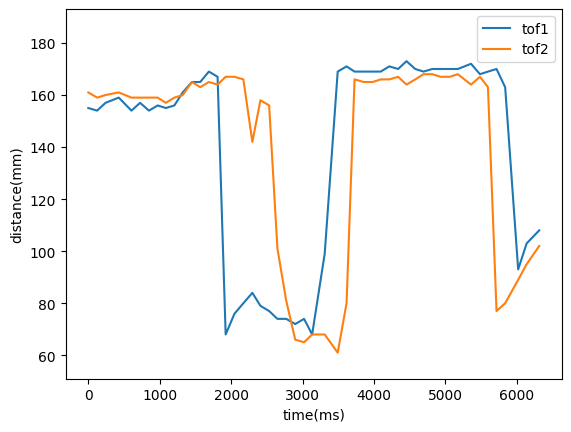

2023-02-11 23:24:08,396 | INFO     |: Disconnected from C0:83:10:69:2C:3C


In [46]:
time_list = [x - time_list[0] for x in time_list]
plt.plot(time_list, tof1_list, label='tof1')
plt.plot(time_list, tof2_list, label='tof2')
plt.ylim(min([min(tof1_list), min(tof2_list)]) - 10, max([max(tof1_list), max(tof2_list)]) + 20)
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()